In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
df = pd.read_excel("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/baze za logit model/adhd_logit.xlsx")
df.head()

,redni broj,grupa,datum rodjenja,datum pregleda,broj protokola,psihijatrijski nalaz,psihicki status,logopedski status,glu,fe,...,beta 3mean,adhd_skor,adhd_(roditelj),trog_II,arq_dtj,dyslexia_r,iqv,iqnv,iqt,dijagnoza
0,1,1,14.10.2007.,3.9.2018.,3001/18,1,1,2,4.7,20.2,...,3.29,89,2,9.11,0.27,2,110,112,111,ADHD
1,2,1,23.2.2010.,26.9.2018.,3002/18,1,1,2,4.8,18.7,...,3.39,87,1,5.30,0.36,2,84,100,91,ADHD
2,3,1,24.10.2008.,3.9.2018.,3003/18,1,1,2,4.9,29.1,...,3.44,102,2,6.60,0.45,2,120,122,121,ADHD
3,4,1,27.2.2008.,3.9.2018.,3004/18,2,1,2,5.3,14.9,...,4.57,91,1,13.00,1.18,1,101,126,123,ADHD
4,6,1,22.04.2007.,3.9.2018.,3006/18,1,1,2,4.5,20.8,...,3.95,91,2,4.00,0.63,2,90,90,90,ADHD


In [103]:
df['dijagnoza']=df['dijagnoza'].map({'ADHD':1, 'Bez dijagnoze':0})

In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import logit 

In [105]:
df=df.drop(['grupa','datum rodjenja', 'datum pregleda', 'broj protokola', 'psihijatrijski nalaz', 'psihicki status', 'logopedski status'],axis=1)

In [106]:
#Standardizovanje prediktora
scaler = StandardScaler()
scaler.fit(df.drop('dijagnoza',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
scaled_features = scaler.fit_transform(df.drop('dijagnoza',axis=1))

In [108]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,redni broj,glu,fe,feritin,Hcy,TSH,FT4,b12,vitamin_d,theta_beta_ratio,...,beta 2 mean,beta 3mean,adhd_skor,adhd_(roditelj),trog_II,arq_dtj,dyslexia_r,iqv,iqnv,iqt
0,-1.679336,-0.664654,0.955543,1.351584,-0.325070,1.256630,-0.752345,-0.824504,0.118401,-0.284511,...,-1.503123,-0.975940,0.272942,1.073366,0.479198,-0.855480,0.455200,0.314564,0.247007,0.310903
1,-1.659832,-0.453453,0.663070,1.351584,2.076703,1.995827,0.852627,-0.550356,1.313506,0.684209,...,-0.760055,-0.853754,0.202472,-0.747280,-0.871041,-0.678575,0.455200,-1.588110,-0.607159,-1.267165
2,-1.640329,-0.242251,2.690883,0.033790,-0.925514,-0.726197,-0.004824,-0.598735,0.619406,-0.664824,...,-0.825896,-0.792661,0.731002,1.073366,-0.410329,-0.501670,0.455200,1.046361,0.958812,1.099937
3,-1.620825,0.602555,-0.077862,-0.137352,0.548302,-0.828305,-1.077736,-1.050274,2.623425,-0.019010,...,0.744893,0.588044,0.343413,-0.747280,1.857788,0.933224,-2.196836,-0.344054,1.243534,1.257744
4,-1.581818,-1.087058,1.072532,0.501578,0.657473,-0.537689,0.553618,-1.077151,2.028482,-1.045136,...,-0.289759,-0.169511,0.343413,1.073366,-1.331752,-0.147861,0.455200,-1.149031,-1.318964,-1.346068


In [113]:
dijagnoza = df['dijagnoza']
dijagnoza

0      1
1      1
2      1
3      1
4      1
      ..
129    0
130    0
131    0
132    0
133    0
Name: dijagnoza, Length: 134, dtype: int64

In [114]:
df_feat['dijagnoza'] = pd.Series(dijagnoza, index=df_feat.index)

In [211]:
#Selektujemo ispitanike koji imaju visok adhd skor ali nemaju dijagnozu
adhd_rekod = df_feat[(df_feat['adhd_skor']>0.5) & (df_feat['dijagnoza']==0)]

In [212]:
adhd_rekod.to_excel('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/adhd_za_rekod.xlsx',sheet_name='Sheet1')

In [117]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_feat,
                                         test_size = 0.20,
                                         random_state = 42)

In [118]:
formula = ('dijagnoza ~ fe + feritin + Hcy + TSH + FT4 + b12 + vitamin_d + theta_beta_ratio + trog_II + iqv + iqnv + iqt')

In [119]:
model = logit(formula = formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.321106
         Iterations 8


In [140]:
results=model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              dijagnoza   No. Observations:                  107
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.5360
Time:                        13:53:07   Log-Likelihood:                -34.358
converged:                       True   LL-Null:                       -74.050
Covariance Type:            nonrobust   LLR p-value:                 5.411e-12
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4381      0.380      1.152      0.249      -0.307       1.183
fe                   0.9558      0.410      2.329      0.020       0.151       1.760
feritin              0.3404      0.396      0.859      0.390      -0.436       1.117
Hcy                  2.7152      0.677      4.014      0.000       1.389       4.041
TSH                  0.1117      0.325      0.344      0.731      -0.525       0.749
FT4                  0.3094      0.381      0.812      0.417      -0.437       1.056
b12                 -0.3871      0.402     -0.962      0.336      -1.175       0.401
vitamin_d           -0.1459      0.305     -0.478      0.633      -0.745       0.453
theta_beta_ratio     0.8587      0.395      2.174      0.030       0.085       1.633
trog_II             -0.8814      0.436     -2.021      0.043      -1.736      -0.027
iqv                 -0.7957      1.015     -0.784      0.433      -2.786       1.194
iqnv                -0.3130      0.924     -0.339      0.735      -2.124       1.498
iqt                  1.0376      1.634      0.635      0.525      -2.164       4.239
====================================================================================
"""

In [197]:
results_text = results.as_csv()

import csv
resultFile = open("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/eksel_table_adhd_only_bio",'w')
resultFile.write(results_text)
resultFile.close()

In [163]:
odd_ratio_adhd = np.exp(model.params)
odd_ratio_adhd.to_excel('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/odd_ratio_adhd_only_bio.xls')

In [156]:
np.exp(model.params)

Intercept            1.549731
fe                   2.600685
feritin              1.405538
Hcy                 15.108334
TSH                  1.118164
FT4                  1.362657
b12                  0.679048
vitamin_d            0.864207
theta_beta_ratio     2.360022
trog_II              0.414192
iqv                  0.451245
iqnv                 0.731283
iqt                  2.822362
dtype: float64

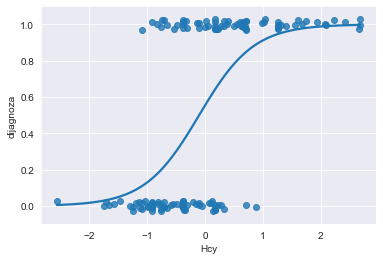

In [180]:
#plot za Hcy homocistein pravi najvecu razliku
#standardizovani skorovi
plot=sns.regplot(x = "Hcy", y = "dijagnoza", 
            y_jitter = 0.03,
            data = df_feat, 
            logistic = True,
            ci = None)

plot.figure.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/homocistein_z.png")

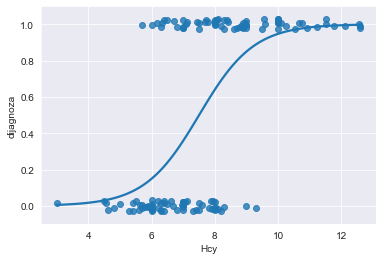

In [179]:
plot1 = sns.regplot(x = "Hcy", y = "dijagnoza", 
            y_jitter = 0.03,
            data = df, 
            logistic = True,
            ci = None)
plot1.figure.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/homocistein_normal.png")

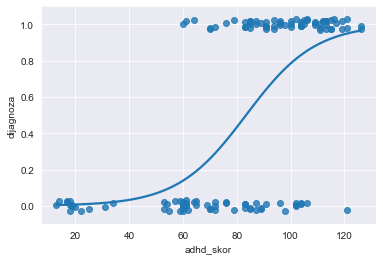

In [176]:
# sirovi skorovi za adhd skor
plot1 = sns.regplot(x = "adhd_skor", y = "dijagnoza", 
            y_jitter = 0.03,
            data = df, 
            logistic = True,
            ci = None)
plot1.figure.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/adhd_normal.png")

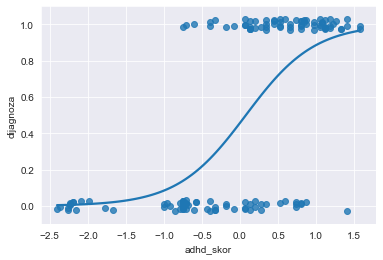

In [178]:
#standardizovani skorovi za adhd skor
plot=sns.regplot(x = "adhd_skor", y = "dijagnoza", 
            y_jitter = 0.03,
            data = df_feat, 
            logistic = True,
            ci = None)

plot.figure.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/adhd_score_z.png")

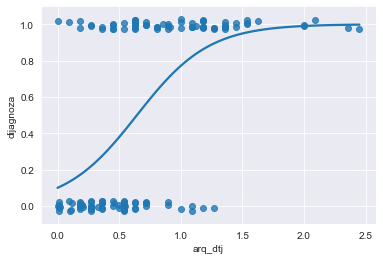

In [181]:
# sirovi skorovi za dst skor
plot1 = sns.regplot(x = "arq_dtj", y = "dijagnoza", 
            y_jitter = 0.03,
            data = df, 
            logistic = True,
            ci = None)
plot1.figure.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/dstj_normal.png")

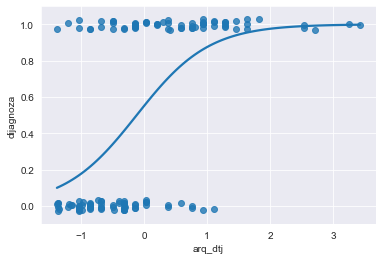

In [182]:
# standardizovani skorovi za dst skor
plot1 = sns.regplot(x = "arq_dtj", y = "dijagnoza", 
            y_jitter = 0.03,
            data = df_feat, 
            logistic = True,
            ci = None)
plot1.figure.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/dstj_z.png")

In [124]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Compute prediction
prediction = model.predict(exog = test_data)



# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = test_data["dijagnoza"]


# Compute and print confusion matrix using crosstab function
conf_matrix = pd.crosstab(y_actual, y_prediction,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_matrix)

Predicted  0   1  All
Actual               
0          4   6   10
1          2  15   17
All        6  21   27


In [193]:
AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())
#interpretation
#The Average Marginal Effets table reports AMEs, standard error, z-values, p-values and 95% confidence intervals. 
#The interpretation of AMEs is similar to linear models. 
#For example, the AME value of Hcy is 0.2770 which can be interpreted as a unit increase in Hcy value (one standard deviation) increases the probability of having ADHD by 27.70%.

        Logit Marginal Effects       
Dep. Variable:              dijagnoza
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
fe                   0.0975      0.038      2.599      0.009       0.024       0.171
feritin              0.0347      0.040      0.874      0.382      -0.043       0.113
Hcy                  0.2770      0.044      6.278      0.000       0.190       0.363
TSH                  0.0114      0.033      0.344      0.731      -0.053       0.076
FT4                  0.0316      0.038      0.824      0.410      -0.044       0.107
b12                 -0.0395      0.040     -0.984      0.325      -0.118       0.039
vitamin_d           -0.0149      0.031     -0.479      0.632      -0.076       0.046
theta_beta_ratio     0.0876      0.037      2.355      0.019       0.015       0.16

In [198]:
results=AME.summary()
results_text2 = results.as_csv()

import csv
resultFile = open("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/AME_only_bio",'w')
resultFile.write(results_text2)
resultFile.close()

In [125]:
accuracy = accuracy_score(y_actual, y_prediction)
print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.70%


In [126]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.71      0.88      0.79        17

    accuracy                           0.70        27
   macro avg       0.69      0.64      0.64        27
weighted avg       0.70      0.70      0.68        27



In [127]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_actual, y_prediction)))

F1 Score: 0.7894736842105262


In [128]:

roc_auc = roc_auc_score(y_actual, y_prediction)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.64%


In [133]:
from plot_metric.functions import BinaryClassification

In [171]:
df_feat.columns

Index(['redni broj', 'glu', 'fe', 'feritin', 'Hcy', 'TSH', 'FT4', 'b12',
       'vitamin_d', 'theta_beta_ratio', 'theta mean', 'low alpha',
       'high alpha', 'alpha mean', 'smr mean', 'beta 1 mean', 'beta 2 mean',
       'beta 3mean', 'adhd_skor', 'adhd_(roditelj)', 'trog_II', 'arq_dtj',
       'dyslexia_r', 'iqv', 'iqnv', 'iqt', 'dijagnoza'],
      dtype='object')

(array([0. , 0.6, 1. ]),
 array([0.        , 0.88235294, 1.        ]),
 array([2, 1, 0]),
 0.6411764705882352)

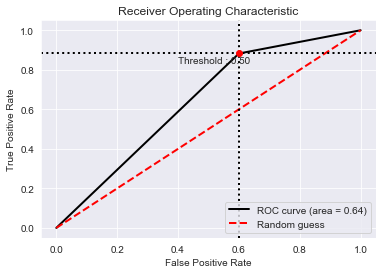

In [170]:
# Visualisation with plot_metric
bc = BinaryClassification(y_actual,
                          y_prediction,
                          labels = ["Class 1", "Class 2"])

# Figures

bc.plot_roc_curve()

In [174]:
#Sada pravimo novi potpuni model za predikciju ADHD gde osim bioloskih ubacujemo i psiholoske prediktore
formula1 = ('dijagnoza ~ fe + feritin + Hcy + TSH + FT4 + b12 + vitamin_d + theta_beta_ratio + adhd_skor + arq_dtj + trog_II + iqv + iqnv + iqt')
model1 = logit(formula = formula1, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.152172
         Iterations 10


In [175]:
results1=model1.summary()
results1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              dijagnoza   No. Observations:                  107
Model:                          Logit   Df Residuals:                       92
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.7801
Time:                        14:37:59   Log-Likelihood:                -16.282
converged:                       True   LL-Null:                       -74.050
Covariance Type:            nonrobust   LLR p-value:                 4.692e-18
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7506      0.841     -0.893      0.372      -2.398       0.897
fe                   0.9434      0.673      1.402      0.161      -0.375       2.262
feritin              0.0090      0.625      0.014      0.989      -1.217       1.235
Hcy                  3.3532      1.007      3.331      0.001       1.380       5.326
TSH                 -0.3000      0.533     -0.563      0.574      -1.345       0.745
FT4                  0.8975      0.715      1.256      0.209      -0.503       2.298
b12                 -0.8800      0.565     -1.557      0.120      -1.988       0.228
vitamin_d           -0.0795      0.497     -0.160      0.873      -1.055       0.896
theta_beta_ratio     1.5029      0.670      2.244      0.025       0.190       2.815
adhd_skor            4.2922      1.481      2.898      0.004       1.390       7.195
arq_dtj              0.6229      0.948      0.657      0.511      -1.235       2.481
trog_II             -0.9065      0.839     -1.080      0.280      -2.551       0.738
iqv                  0.7843      1.862      0.421      0.674      -2.866       4.434
iqnv                 0.1019      1.498      0.068      0.946      -2.834       3.038
iqt                  0.0381      2.593      0.015      0.988      -5.044       5.120
====================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [183]:
results_text1 = results1.as_csv()

import csv
resultFile = open("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/eksel_table_adhd_all",'w')
resultFile.write(results_text1)
resultFile.close()

In [184]:
# Compute prediction
prediction = model1.predict(exog = test_data)



# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = test_data["dijagnoza"]


# Compute and print confusion matrix using crosstab function
conf_matrix = pd.crosstab(y_actual, y_prediction,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_matrix)

Predicted  0   1  All
Actual               
0          7   3   10
1          2  15   17
All        9  18   27


In [192]:
odd_ratio_adhd_all = np.exp(model1.params)
odd_ratio_adhd_all.to_excel('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/odd_ratio_adhd_all.xls')
odd_ratio_adhd_all

Intercept            0.472067
fe                   2.568623
feritin              1.009040
Hcy                 28.593274
TSH                  0.740819
FT4                  2.453382
b12                  0.414784
vitamin_d            0.923549
theta_beta_ratio     4.494611
adhd_skor           73.125799
arq_dtj              1.864292
trog_II              0.403952
iqv                  2.190830
iqnv                 1.107320
iqt                  1.038848
dtype: float64

In [200]:
AME1 = model1.get_margeff(at='overall', method='dydx')
print(AME1.summary())

        Logit Marginal Effects       
Dep. Variable:              dijagnoza
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
fe                   0.0428      0.029      1.460      0.144      -0.015       0.100
feritin              0.0004      0.028      0.014      0.989      -0.055       0.056
Hcy                  0.1522      0.031      4.954      0.000       0.092       0.212
TSH                 -0.0136      0.024     -0.572      0.567      -0.060       0.033
FT4                  0.0407      0.031      1.328      0.184      -0.019       0.101
b12                 -0.0399      0.024     -1.662      0.096      -0.087       0.007
vitamin_d           -0.0036      0.023     -0.160      0.873      -0.048       0.041
theta_beta_ratio     0.0682      0.027      2.549      0.011       0.016       0.12

In [202]:
results1=AME1.summary()
results_text2 = results1.as_csv()

import csv
resultFile = open("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rezultati logit modeli/AME_all",'w')
resultFile.write(results_text2)
resultFile.close()

In [185]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_actual, y_prediction)))

F1 Score: 0.8571428571428571


In [187]:
roc_auc = roc_auc_score(y_actual, y_prediction)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.79%


(array([0. , 0.3, 1. ]),
 array([0.        , 0.88235294, 1.        ]),
 array([2, 1, 0]),
 0.7911764705882353)

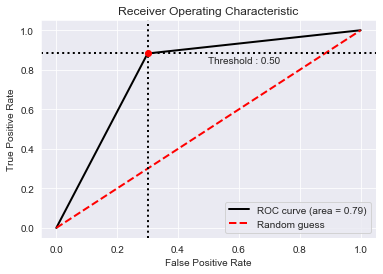

In [188]:
# Visualisation with plot_metric
bc = BinaryClassification(y_actual,
                          y_prediction,
                          labels = ["Class 1", "Class 2"])

# Figures

bc.plot_roc_curve()